## Are coexpression groups in relative orientations we'd expect?

Both a starting point to look at Tami's coexpression clusters, as well as answering above question


start in one tissue "whole_blood", build pipeline, then expand to others

In [151]:
# import packages
import numpy as np
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
# get the coexpression groups
whole_blood_clusters_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/Whole_Blood/clusters_all_chr.csv'

# data from all chromosomes combined
clusters = pd.read_csv(whole_blood_clusters_path)
clusters.head()

,N_genes,Transcripts,Genes,Perc_cor,Mean_cor,Mean_pos_cor,Mean_neg_cor,Chromosome,Tissue
0,50,"ENSG00000128228.4,ENSG00000272954.1,ENSG000001...","PPIL2, YPEL1, MAPK1, PPM1F, TOP3B, SDF2L1, PRA...",7.510,0.254,0.279,-0.300,22,Whole_Blood
1,21,"ENSG00000100239.15,ENSG00000100241.20,ENSG0000...","MAPK8IP2, TYMP, NCAPH2, RABL2B, PPP6R2, SBF1, ...",7.619,0.274,0.274,NaN,22,Whole_Blood
2,49,"ENSG00000161180.10,ENSG00000128228.4,ENSG00000...","PPIL2, YPEL1, MAPK1, PPM1F, TOP3B, SDF2L1, CCD...",7.058,0.251,0.279,-0.300,22,Whole_Blood
3,47,"ENSG00000185651.14,ENSG00000161179.13,ENSG0000...","PPIL2, YPEL1, MAPK1, PPM1F, TOP3B, SDF2L1, YDJ...",7.031,0.249,0.280,-0.300,22,Whole_Blood
4,39,"ENSG00000211662.2,ENSG00000211663.2,ENSG000002...","RSPH14, RAB36, VPREB3, GNAZ, IGLL1, RGL4, C22o...",7.827,0.300,0.310,-0.244,22,Whole_Blood


In [40]:
# direction of genes within groups
# download the gene list to get strand information
gtf_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/data/gencode.v26.GRCh38.genes.gtf'

full_g = pr.read_gtf(gtf_path)
transcript_df = full_g[full_g.Feature == 'transcript'].df
transcript_df.head()

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,gene_type,gene_name,transcript_type,transcript_name,level,havana_gene,exon_id,exon_number,tag
0,chr1,HAVANA,transcript,11868,14403,.,+,.,ENSG00000223972.5,ENSG00000223972.5,transcribed_unprocessed_pseudogene,DDX11L1,transcribed_unprocessed_pseudogene,DDX11L1,2,OTTHUMG00000000961.2,NaN,NaN,NaN
1,chr1,HAVANA,transcript,29570,31109,.,+,.,ENSG00000243485.5,ENSG00000243485.5,lincRNA,MIR1302-2HG,lincRNA,MIR1302-2HG,2,OTTHUMG00000000959.2,NaN,NaN,ncRNA_host
2,chr1,HAVANA,transcript,52472,53312,.,+,.,ENSG00000268020.3,ENSG00000268020.3,unprocessed_pseudogene,OR4G4P,unprocessed_pseudogene,OR4G4P,2,OTTHUMG00000185779.1,NaN,NaN,NaN
3,chr1,HAVANA,transcript,62947,63887,.,+,.,ENSG00000240361.1,ENSG00000240361.1,unprocessed_pseudogene,OR4G11P,unprocessed_pseudogene,OR4G11P,2,OTTHUMG00000001095.2,NaN,NaN,NaN
4,chr1,HAVANA,transcript,69090,70008,.,+,.,ENSG00000186092.4,ENSG00000186092.4,protein_coding,OR4F5,protein_coding,OR4F5,2,OTTHUMG00000001094.2,NaN,NaN,NaN


In [50]:
# add strand information to dataframe 
def frac_same_strand(row):
    ids = row.Transcripts.split(',')
    s = transcript_df[transcript_df.transcript_id.isin(ids)].Strand
    return sum(s=='+')/len(s)

<Axes: xlabel='Mean_cor', ylabel='frac_pos_strand'>

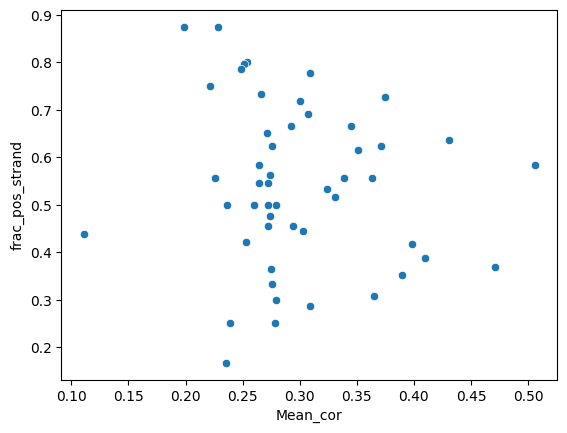

In [63]:
# not a lot to see when we look at the correlations in the cluster as a whole

clusters['frac_pos_strand'] = clusters.apply(frac_same_strand, axis=1) 
sns.scatterplot(clusters, x='Mean_cor', y='frac_pos_strand')

In [112]:
# look at one away from diagonal pairs and the relative orientations
# for this I need the actually gene-gene cors
# they appear to be sorted such that G1 tss is always upstream of g2 tss

corr_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/Whole_Blood/sig_corr_df_chr1_yes_covars_0pc_60peers_w_distances.csv'
corr_1 = pd.read_csv(corr_path)
corr_1.head()

,Gene1,Gene2,Corr_coefficient,P,Gene1_name,G1_start,G1_end,G1_distance_rank,G1_distance_exp_rank,Gene2_name,G2_start,G2_end,G2_distance_rank,G2_distance_exp_rank
0,ENSG00000000938.12,ENSG00000116337.15,0.202690,1.053440e-09,FGR,27612064,27635277,843,403,AMPD2,109619504,109632051,2338,999
1,ENSG00000000938.12,ENSG00000158869.10,0.216572,1.044002e-09,FGR,27612064,27635277,843,403,FCER1G,161215234,161220699,3401,1508
2,ENSG00000004455.16,ENSG00000135823.13,0.190045,2.095031e-08,AK2,33007940,33080996,1013,494,STX6,180972712,181023121,3791,1648
3,ENSG00000007933.12,ENSG00000117601.13,0.311193,5.765876e-18,FMO3,171090877,171117819,3610,1588,SERPINC1,173903804,173917378,3671,1610
4,ENSG00000007968.6,ENSG00000133069.15,0.209637,4.101742e-09,E2F2,23506430,23531220,693,321,TMCC2,205228176,205273343,4175,1788


In [113]:
corr_1['Gene1_strand'] = transcript_df.set_index('transcript_id').loc[corr_1['Gene1']].Strand.values
corr_1['Gene2_strand'] = transcript_df.set_index('transcript_id').loc[corr_1['Gene2']].Strand.values

In [114]:
# get downstream orentation information
def get_orr(strands1, strands2):
    orrs = pd.Series(['tandem']*len(strands1))
    # where they are different, conv or div based on the downstream gene identity
    orrs = orrs.mask(strands1 != strands2, np.where(strands1 == '-', 'divergent', 'convergent'))
    return orrs

corr_1['orr'] = get_orr(corr_1['Gene1_strand'], corr_1['Gene2_strand'])

<Axes: xlabel='orr', ylabel='Corr_coefficient'>

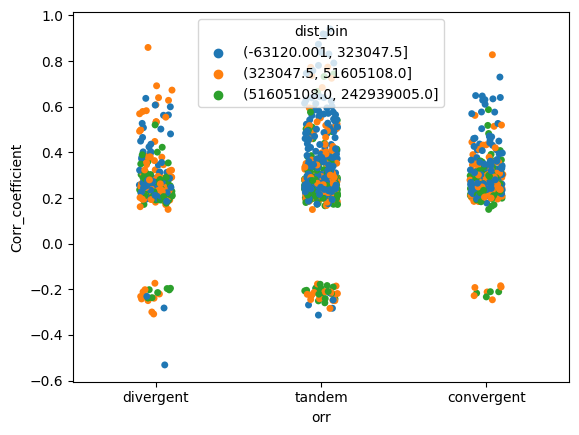

In [123]:
corr_1['center_dist'] = (corr_1['G2_start'] + corr_1['G2_end']) / 2 -(corr_1['G1_start'] + corr_1['G1_end']) / 2
corr_1['dist_bin'] = pd.qcut(corr_1['center_dist'], 3)
sns.stripplot(corr_1, y='Corr_coefficient', x='orr', hue='dist_bin')

In [140]:
# combine over multiple chromosomes
corr_list=[]
for i in range(23):
    corr_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/Whole_Blood/sig_corr_df_chr{}_yes_covars_0pc_60peers_w_distances.csv'.format(i)
    try: 
        corr_df = pd.read_csv(corr_path)
            # add strands
        corr_df['Gene1_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene1']].Strand.values
        corr_df['Gene2_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene2']].Strand.values

        # add orrientation
        corr_df['orr'] = get_orr(corr_df['Gene1_strand'], corr_df['Gene2_strand'])

        # add distance 
        corr_df['center_dist'] = (corr_df['G2_start'] + corr_df['G2_end']) / 2 -(corr_df['G1_start'] + corr_df['G1_end']) / 2

        corr_list.append(corr_df)
    except FileNotFoundError:
        print('no file at {}'.format(corr_path))

no file at /oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/Whole_Blood/sig_corr_df_chr0_yes_covars_0pc_60peers_w_distances.csv


<Axes: xlabel='orr', ylabel='Corr_coefficient'>

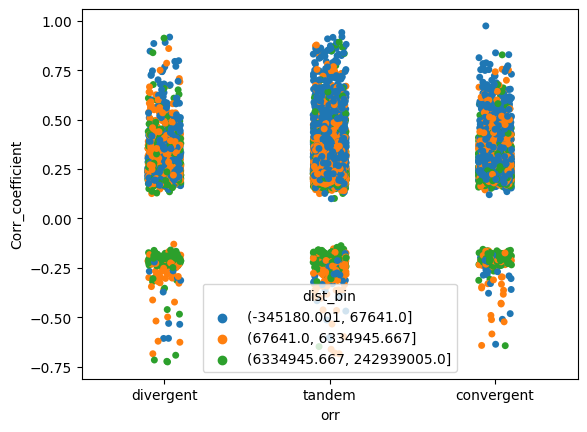

In [141]:
corr_df = pd.concat(corr_list)
corr_df['dist_bin'] = pd.qcut(corr_df['center_dist'], 3)

sns.stripplot(corr_df, y='Corr_coefficient', x='orr', hue='dist_bin')

In [182]:
# combine over multiple chromosomes, and multiple tissues

for tissue in os.listdir('/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/'):
    print(tissue)
    corr_list=[]
    for chri in range(24):
        corr_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/{}/sig_corr_df_chr{}_yes_covars_0pc_60peers_w_distances.csv'.format(tissue, chri)
        try: 
            corr_df = pd.read_csv(corr_path)
                # add strands
            corr_df['Gene1_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene1']].Strand.values
            corr_df['Gene2_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene2']].Strand.values

            # add orrientation
            corr_df['orr'] = get_orr(corr_df['Gene1_strand'], corr_df['Gene2_strand'])

            # add distance 
            corr_df['center_dist'] = (corr_df['G2_start'] + corr_df['G2_end']) / 2 -(corr_df['G1_start'] + corr_df['G1_end']) / 2

            corr_list.append(corr_df)
        except FileNotFoundError:
            pass
            #print('no file at {}'.format(corr_path))
    
    corr_df = pd.concat(corr_list)       
    # only take pairs less than 50kb apart
    corr_df = corr_df[corr_df['center_dist']<50000]
    frac_neg = pd.Series(dtype='float64')
    for o in corr_df.orr.unique():
        frac_neg[o] = sum(corr_df[corr_df['orr'] == o]['Corr_coefficient'] < 0)/len(corr_df[corr_df['orr'] ==o])

    try:
        across_tissue_corr.loc[tissue] = frac_neg
    except NameError:
        # for the first tissue, make the df
        across_tissue_corr=pd.DataFrame.from_dict({tissue:frac_neg}).transpose()


Skin_Not_Sun_Exposed_Suprapubic
Muscle_Skeletal
Adipose_Visceral_Omentum
Skin_Sun_Exposed_Lower_leg
Whole_Blood
Esophagus_Muscularis
Thyroid
Lung
Nerve_Tibial
Cells_Cultured_fibroblasts
Esophagus_Mucosa
Artery_Tibial
Adipose_Subcutaneous


In [183]:
across_tissue_corr

,tandem,convergent,divergent
Wholeblood,0.022059,0.027682,0.015625
Skin_Not_Sun_Exposed_Suprapubic,0.027478,0.026440,0.046185
Muscle_Skeletal,0.023544,0.025105,0.018975
Adipose_Visceral_Omentum,0.020285,0.030273,0.027601
Skin_Sun_Exposed_Lower_leg,0.036228,0.038835,0.047348
Whole_Blood,0.022059,0.027682,0.015625
Esophagus_Muscularis,0.044280,0.042627,0.059140
Thyroid,0.032258,0.036642,0.043011
Lung,0.022384,0.020270,0.035865
Nerve_Tibial,0.051483,0.043557,0.059184


In [184]:
# combine over multiple chromosomes, and multiple tissues

for tissue in os.listdir('/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/'):
    print(tissue)
    corr_list=[]
    for chri in range(24):
        corr_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/{}/sig_corr_df_chr{}_yes_covars_0pc_60peers_w_distances.csv'.format(tissue, chri)
        try: 
            corr_df = pd.read_csv(corr_path)
                # add strands
            corr_df['Gene1_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene1']].Strand.values
            corr_df['Gene2_strand'] = transcript_df.set_index('transcript_id').loc[corr_df['Gene2']].Strand.values

            # add orrientation
            corr_df['orr'] = get_orr(corr_df['Gene1_strand'], corr_df['Gene2_strand'])

            # add distance 
            corr_df['center_dist'] = (corr_df['G2_start'] + corr_df['G2_end']) / 2 -(corr_df['G1_start'] + corr_df['G1_end']) / 2

            corr_list.append(corr_df)
        except FileNotFoundError:
            pass
            #print('no file at {}'.format(corr_path))
    
    corr_df = pd.concat(corr_list)       
    # only take pairs less than 50kb apart
    corr_df = corr_df[corr_df['center_dist']<50000]
    frac_neg = pd.Series(dtype='float64')
    for o in corr_df.orr.unique():
        frac_neg[o] = np.mean(corr_df[corr_df['orr'] == o]['Corr_coefficient'])

    try:
        avgacross_tissue_corr.loc[tissue] = frac_neg
    except NameError:
        # for the first tissue, make the df
        avgacross_tissue_corr=pd.DataFrame.from_dict({tissue:frac_neg}).transpose()


Skin_Not_Sun_Exposed_Suprapubic
Muscle_Skeletal
Adipose_Visceral_Omentum
Skin_Sun_Exposed_Lower_leg
Whole_Blood
Esophagus_Muscularis
Thyroid
Lung
Nerve_Tibial
Cells_Cultured_fibroblasts
Esophagus_Mucosa
Artery_Tibial
Adipose_Subcutaneous


In [185]:
avgacross_tissue_corr

,divergent,tandem,convergent
Skin_Not_Sun_Exposed_Suprapubic,0.342819,0.379695,0.346776
Muscle_Skeletal,0.303729,0.327770,0.321265
Adipose_Visceral_Omentum,0.349092,0.376355,0.359120
Skin_Sun_Exposed_Lower_leg,0.318806,0.347814,0.320162
Whole_Blood,0.316983,0.334533,0.314448
Esophagus_Muscularis,0.324920,0.358753,0.350024
Thyroid,0.336402,0.354775,0.343547
Lung,0.336450,0.367525,0.355351
Nerve_Tibial,0.313680,0.345810,0.334264
Cells_Cultured_fibroblasts,0.344387,0.366313,0.350200
